In [1]:
import pandas as pd
import pickle
from skimage.transform import rescale
import imageio
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

tf.keras.backend.clear_session()

with open('/home/robotixx/Documents/elevation.pickle', 'rb') as f:
    df = pickle.load(f)

with open('/home/robotixx/Documents/traversability.pickle', 'rb') as f:
    df1 = pickle.load(f)
    
df.shape, df1.shape

2023-05-03 14:24:42.895313: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-03 14:24:42.915653: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 14:24:43.201979: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


((4057, 5), (4057, 5))

In [27]:
tf.keras.backend.clear_session()

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


2023-05-03 14:24:48.172797: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-03 14:24:48.201957: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-03 14:24:48.202044: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
X_e = list(df['image'].values)
X_e= np.array(X_e)
y_e = df['pitch'].values

#discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
#y_l = discretizer.fit_transform(y.reshape(-1, 1)).ravel()
#y = y.reshape(y.shape[0], -1)

X_t = list(df1['image'].values)
X_t = np.array(X_t)
y_t = df1['pitch'].values



In [5]:
f = y_e.tolist()
z = y_t.tolist()
ze = []
for i in range (len(f)):
    if (abs(f[i] - z[i]) < 0.6):
        ze.append(i)
      
xd1 = X_e[ze]
xd2 = X_t[ze]
yd1 = y_e[ze]
yd2 = y_t[ze]
xd1.shape, xd2.shape, yd1.shape, yd2.shape

((4022, 400, 200), (4022, 400, 200), (4022,), (4022,))

In [6]:
xs_e =[]
xs_t =[] 
ys_e =[]
ys_t =[]
for i in range (len(xd1)-4):
    xs_e.append([xd1[i], xd1[i+1], xd1[i+2], xd1[i+3]])
    xs_t.append([xd2[i], xd2[i+1], xd2[i+2], xd2[i+3]])
    ys_e.append((yd1[i] + yd1[i+1] + yd1[i+2] + yd1[i+3])/4)
    ys_t.append((yd2[i] + yd2[i+1] + yd2[i+2] + yd2[i+3])/4)

xs_e = np.array(xs_e)
xs_e = np.transpose(xs_e, (0, 2, 3, 1))

xs_t = np.array(xs_t)
xs_t = np.transpose(xs_t, (0, 2, 3, 1))

ys_e = np.array(ys_e)
ys_t = np.array(ys_t)

xs_e.shape, xs_t.shape, ys_e.shape,ys_t.shape

((4018, 400, 200, 4), (4018, 400, 200, 4), (4018,), (4018,))

In [ ]:
xs_e =[]
xs_t =[] 
ys_e =[]
ys_t =[]
for i in range (len(xd1)-4):
    xs_e.append([xd1[i]])
    xs_t.append([xd2[i]])
    ys_e.append(yd1[i])
    ys_t.append(yd2[i])

xs_e = np.array(xs_e)
xs_e = np.transpose(xs_e, (0, 2, 3, 1))

xs_t = np.array(xs_t)
xs_t = np.transpose(xs_t, (0, 2, 3, 1))

ys_e = np.array(ys_e)
ys_t = np.array(ys_t)

xs_e.shape, xs_t.shape, ys_e.shape,ys_t.shape

In [7]:

# Step 2: Define the CNN model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(400, 200, 4)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Step 3: Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])



2023-05-03 14:25:31.225220: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-03 14:25:31.225356: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-03 14:25:31.225425: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(xs_e, ys_e, test_size=0.3, random_state=34)
X_train.shape, y_train.shape, X_test.shape

((2812, 400, 200, 4), (2812,), (1206, 400, 200, 4))

In [21]:
# train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=48)


Epoch 1/150
59/59 [==============================] - 3s 43ms/step - loss: 0.3561 - mae: 0.4480 - val_loss: 4.1454 - val_mae: 1.4990
Epoch 2/150
59/59 [==============================] - 2s 36ms/step - loss: 0.3795 - mae: 0.4515 - val_loss: 4.5426 - val_mae: 1.5651
Epoch 3/150
59/59 [==============================] - 2s 37ms/step - loss: 0.3435 - mae: 0.4314 - val_loss: 4.3010 - val_mae: 1.5063
Epoch 4/150
59/59 [==============================] - 2s 36ms/step - loss: 0.2805 - mae: 0.3941 - val_loss: 4.3065 - val_mae: 1.5158
Epoch 5/150
59/59 [==============================] - 2s 36ms/step - loss: 0.4233 - mae: 0.4855 - val_loss: 4.3857 - val_mae: 1.5384
Epoch 6/150
59/59 [==============================] - 2s 36ms/step - loss: 0.3361 - mae: 0.4315 - val_loss: 4.2200 - val_mae: 1.5059
Epoch 7/150
59/59 [==============================] - 2s 36ms/step - loss: 0.3972 - mae: 0.4684 - val_loss: 4.5088 - val_mae: 1.5832
Epoch 8/150
59/59 [==============================] - 2s 36ms/step - loss: 0.

In [22]:
# use the model to make predictions
y_pred = model.predict(X_test)

38/38 [==============================] - 0s 8ms/step


In [23]:
#model.save_weights('weights.dat')

In [24]:
loss = model.evaluate(X_test, y_test)

38/38 [==============================] - 0s 8ms/step - loss: 3.5005 - mae: 1.3608


In [25]:
l = []
for i in range(len(y_test)):
    l.append(abs(y_pred[i] - y_test[i]))
sum(l)/len(l), max(l), min(l)

(array([1.3607693], dtype=float32),
 array([9.908542], dtype=float32),
 array([0.00088453], dtype=float32))

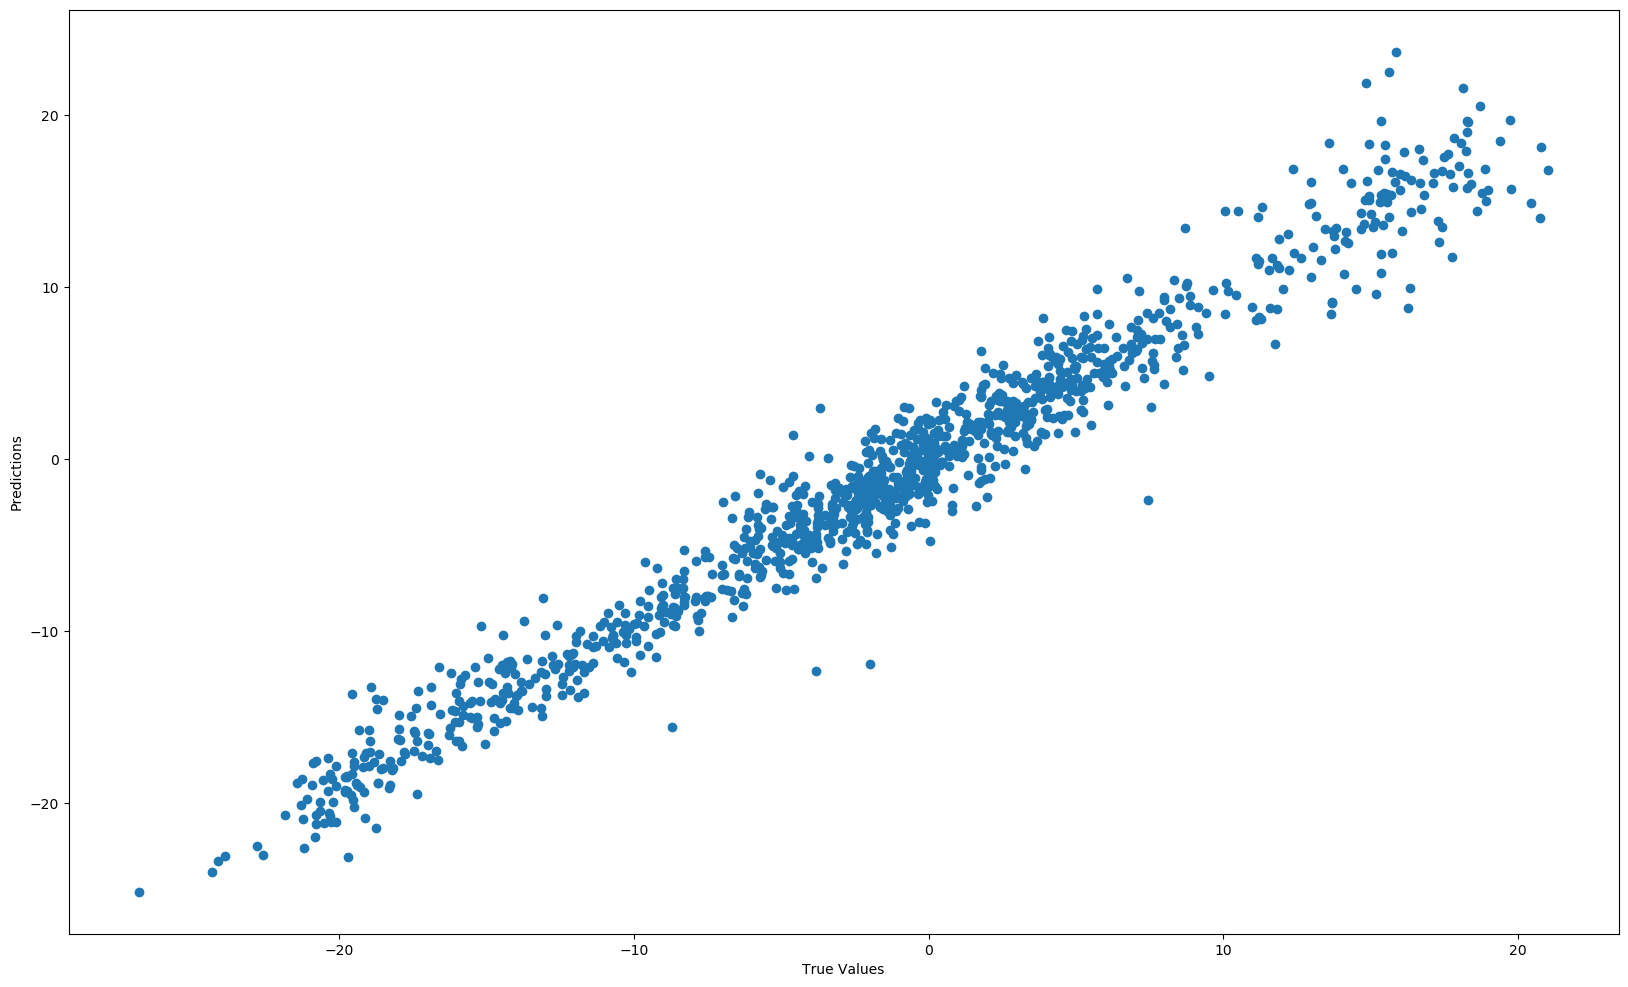

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")

plt.show()